### Ejercicio 1. Resolver con Runge-Kutta orden 4

In [2]:
F(x,t) = [x[2]-(x[2])^3,-x[1]-(x[2])^2] #Se crea una función vectorial del sistema de ecuaciones. 

F (generic function with 1 method)

In [3]:
function Runge_Kutta_orden_4_vec(f,list,x0) #Se crea una función que permite, mediante el método de Runge-Kutta de
    #orden 4 vectorial, obtener la solución aproximada de una ecuación diferencial. Las entradas de esta 
    #función son la función, el valor inicial x0 y una lista.
    
    x = x0
    h = list[2]-list[1]#calculamos el tamaño del paso
    listx = [] #Se crea un vector en donde se guardan los valores xk del método de Runge-Kutta de 
    #orden 4.
    push!(listx,x)#se  gurada la los valores de x en listx
    
        for i in 2:length(list) #Se realiza un for donde se da un intervalo a i cuyo tamaño es el
        #de la lista t.
            t = i*h
            #Se definen funciones necesarias para implementar el método de Runge-Kutta de orden 4.
            k1 = f(x,t)
            k2 = f(x + ((h/2) * k1),t + h/2)
            k3 = f(x + ((h/2) * k2),t + h/2)
            k4 = f(x + h * k3,t + h)
            x = x + (h/6) * (k1 + 2 * k2 + 2 * k3 + k4)#Se realiza la operación que determina los 
            #valores xk.
            push!(listx,x) #Se guarda el valor de xk en la lista x.
        end
     return listx #Se regresa la lista listx.
end

Runge_Kutta_orden_4_vec (generic function with 1 method)

In [4]:
using PyPlot

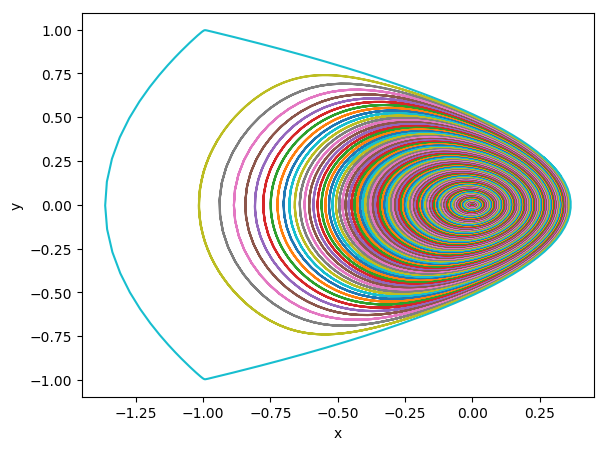

/home/danielsandy/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [5]:
lista = -12:0.1:12 #Se define una lista de t.
X = linspace(0,1,100)    
for i in X #Se realiza un for donde se grafica x para crear las condiciones iniciales.
        
        x = 0.26794929374*i #Se asigna una condición inicial x0 aleatoriamente.
        y = 0.26794929374*i #Se asigna una condición inicial y0 aleatoriamente.
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(F,lista,[x,y])
        listx1 = map(x->x[1],vec1) #Se guardan en listx1 los elementos x[1] de la solución.
        listx2 = map(x->x[2],vec1) #Se guardan en listx2 los elementos x[2] de la solución.
        xlabel("x")
        ylabel("y")
        plot(listx1,listx2)
        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end


Aquí se han graficado condiciones iniciales aleatorias en el espacio (x,y), podemos observar 3 puntos fijos $ (x = 0, y = 0), (x = - 1, y = - 1),  (x = - 1, y = 1) $. El primero es un centro, y los otros son puntos inestables.

Para obtener los puntos fijos, igualamos $ \overline{F} = \overline{0}$, esto es

$$\overline{F} = \left( \begin{array}{lcr}
 y - y^3 \\
-x - y^2 
\end{array}
\right) = \overline{0}$$

De la ecuación  
$$ y (1 - y^2) = 0 $$
hallamos que las raíces son
$$ y = 0,-1,1 $$
Y de la ecuación 
$$ - x - y^2 = 0$$
obtenemos los valores para x
$$y = 0 \Rightarrow x = 0 $$
$$y = -1 \Rightarrow x = -1 $$
$$y = 1 \Rightarrow x = 1 $$
Por lo que se obtienen los siguientes tres puntos fijos
$$y = 0, x = 0 ... (1)$$
$$y = -1, x = -1 ... (2)$$
$$y = 1, x = -1 ... (3)$$
Por otro lado, el jacobiano es
$$ \left( \begin{array}{lcr}
0 & 1 - 3x^2 \\
-1 & -2y 
\end{array}
\right)$$
Evaluando el Jacobiano en el punto fijo (1) obtenemos

$$\overline{A} =  \left( \begin{array}{lcr}
0 & 1 \\
-1 & 0 
\end{array}
\right)$$

La traza de A es $ tr(A) = 0 $ y su determinante $\triangle A = 1$ Por lo que este punto es un centro.

Evaluando ahora en el punto fijo (2) se tiene

$$\overline{B} =  \left( \begin{array}{lcr}
0 & -2 \\
-1 & 2 
\end{array}
\right)$$

La traza de B es $ tr(B) = 2 $ y su determinante $\triangle B = -2$ 

Por último, evaluando en el punto fijo (3) se tiene

$$\overline{C} =  \left( \begin{array}{lcr}
0 & -2 \\
-1 & -2 
\end{array}
\right)$$

La traza de C es $ tr(C) = -2 $ y su determinante $\triangle C = -2$


### Ejercicio 2. Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol

In [7]:
G(x,u) = [x[2],x[2]*(1 - (x[1])^2)/2 - x[1]] #Se crea una función vectorial del sistema de ecuaciones. 

G (generic function with 1 method)

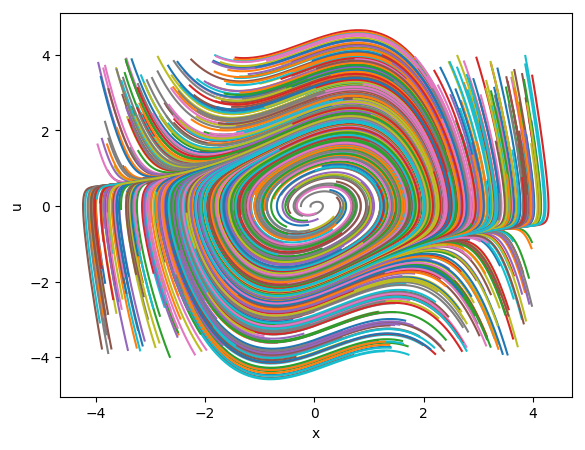

In [15]:
lista = -10:0.01:10 #Se define una lista de t.

    for i in 1:1000 #Se realiza un for donde se grafica x para 1000 condiciones iniciales aleatorias.
        x = 4*(2rand()-1)#Se asigna una condición inicial x0 aleatoriamente.
        u = 4*(2rand()-1)
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(G,lista,[x,u])
        listx1 = map(x->x[1],vec1) #Se guardan en listx1 los elementos x[1] de la solución.
        listx2 = map(x->x[2],vec1) #Se guardan en listx2 los elementos x[2] de la solución.
        xlabel("x")
        ylabel("u")
        plot(listx1,listx2)

        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end

Aquí se están graficando varias condiciones iniciales en el espacio (x,u). 

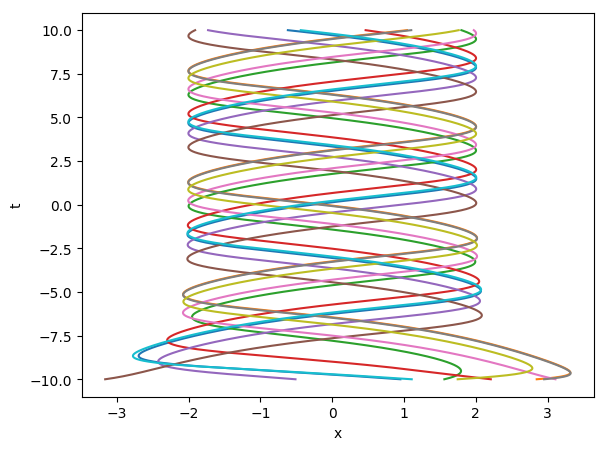

In [24]:
lista = -10:0.01:10 #Se define una lista de t.

    for i in 1:10 #Se realiza un for donde se grafica x para 1000 condiciones iniciales aleatorias.
        x = 4*(2rand()-1)#Se asigna una condición inicial x0 aleatoriamente.
        u = 4*(2rand()-1)
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(G,lista,[x,u])
        listx1 = map(x->x[1],vec1) #Se guardan en listx1 los elementos x[1] de la solución.
        listx2 = map(x->x[2],vec1) #Se guardan en listx2 los elementos x[2] de la solución.
        xlabel("x")
        ylabel("t")
        plot(listx1,lista)
    
        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end

Esta gráfica muestra las condiciones iniciales en el espacio (x,t).

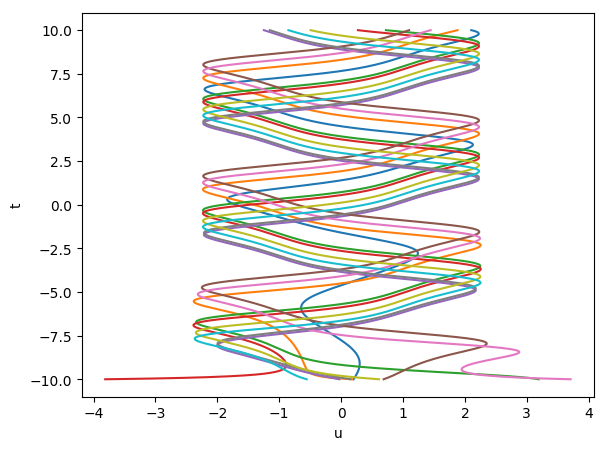

In [23]:
lista = -10:0.01:10 #Se define una lista de t.

    for i in 1:10 #Se realiza un for donde se grafica x para 1000 condiciones iniciales aleatorias.
        x = 4*(2rand()-1)#Se asigna una condición inicial x0 aleatoriamente.
        u = 4*(2rand()-1)
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(G,lista,[x,u])
        listx1 = map(x->x[1],vec1) #Se guardan en listx1 los elementos x[1] de la solución.
        listx2 = map(x->x[2],vec1) #Se guardan en listx2 los elementos x[2] de la solución.
        xlabel("u")
        ylabel("t")
        plot(listx2,lista)

        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end

Por último, esta gráfica muestra condiciones iniciales en el espacio (u,t).

### Ejercicio extra 

In [9]:
H(x,t) = [-1,x[2]*(1 - (x[2])^2)] #Se crea una función vectorial del sistema de ecuaciones. 

H (generic function with 1 method)

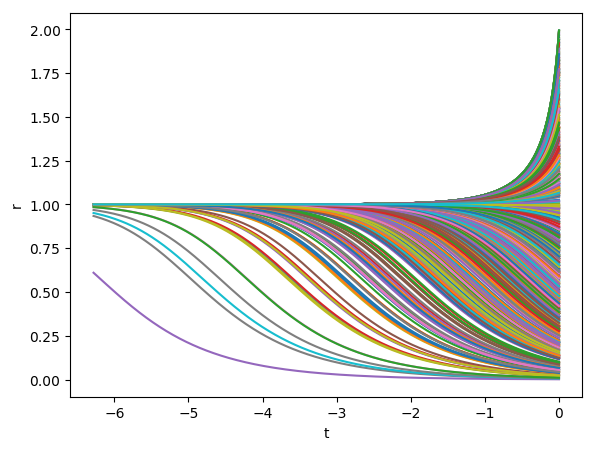

In [20]:
lista = -pi:0.01:pi #Se define una lista de t.

    for i in 1:1000 #Se realiza un for donde se grafica x para 1000 condiciones iniciales aleatorias.
        r = 2rand()#Se asigna una condición inicial x0 aleatoriamente.
        t = 0
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(H,lista,[t,r])
        listx1 = map(x->x[1],vec1) #Se guardan en listx1 los elementos x[1] de la solución.
        listx2 = map(x->x[2],vec1) #Se guardan en listx2 los elementos x[2] de la solución.
        xlabel("t")
        ylabel("r")
        plot(listx1,listx2)

        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end

En esta gráfica se presentan condiciones iniciales aleatorias en el espacio (r,t) donde se observa un valor límite en (r = 1) y condiciones que convergen a él tanto desde r < 1 como desde r > 1.

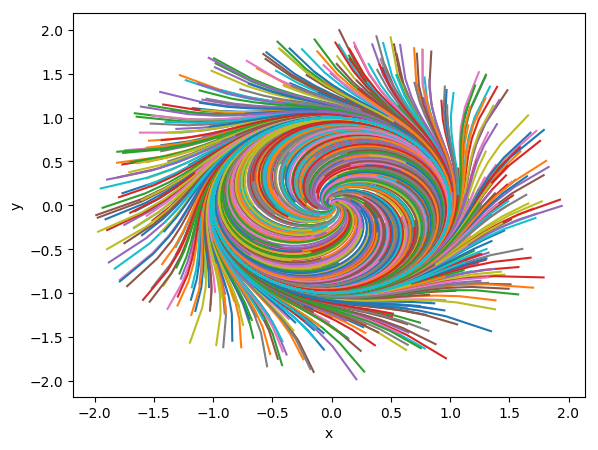

In [21]:
lista = 0:0.1:30 #Se define una lista de t.

    for i in 1:1000 #Se realiza un for donde se grafica x para 1000 condiciones iniciales aleatorias.
        r = 2rand()#Se asigna una condición inicial x0 aleatoriamente.
        t = 2pi*rand()
        ax = axes()
        vec1 = Runge_Kutta_orden_4_vec(H,lista,[t,r])
        listx1 = map(x->x[2]*cos(x[1]),vec1) #Se guardan en listx1 los elementos x[2]*cos(x[1]) de la solución.
        listx2 = map(x->x[2]*sin(x[1]),vec1) #Se guardan en listx2 los elementos x[2]*sin(x[1]) de la solución.
        xlabel("x")
        ylabel("y")
        plot(listx1,listx2)

        legend(bbox_to_anchor=[1.05,1],loc = 2,borderaxespad = 0)
        ax[:set_position]([0.06,0.06,0.8,0.8])
    end

En esta gráfica se presentan condiciones iniciales aleatorias en el espacio (x,y) donde se observa un círculo límite de radio 1 y condiciones que convergen a él tanto desde el interior (radio < 1) como desde el exterior (radio > 1).